## Waste Management Using CNN Model

In [2]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [3]:
#pip install tensorflow

In [4]:
pip install --upgrade matplotlib


Note: you may need to restart the kernel to use updated packages.


In [5]:
# Importing necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

In [6]:
train_path = "DATASET/TRAIN"
test_path = "DATASET/TEST"

In [7]:
# Importing libraries for tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.utils import plot_model
from glob import glob

In [8]:
#visualization

from cv2 import cvtColor
x_data = []
y_data = []
for category in glob(train_path+'/*'):
    for file in tqdm(glob(category+'/*')):
        img_array = cv2.imread(file)
        img_array= cvtColor(img_array,cv2.COLOR_BGR2RGB)
        x_data.append(img_array)
        y_data.append(category.split('/')[-1])
data = pd.DataFrame({'image':x_data, 'label': y_data})

100%|██████████| 9999/9999 [01:05<00:00, 152.69it/s]


In [9]:
data.head

<bound method NDFrame.head of                                                    image    label
0      [[[255, 255, 255], [255, 255, 255], [255, 255,...  TRAIN\O
1      [[[241, 242, 247], [241, 242, 247], [241, 242,...  TRAIN\O
2      [[[224, 224, 224], [229, 229, 229], [236, 236,...  TRAIN\O
3      [[[255, 255, 255], [255, 255, 255], [255, 255,...  TRAIN\O
4      [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...  TRAIN\O
...                                                  ...      ...
22559  [[[212, 204, 202], [212, 204, 202], [212, 204,...  TRAIN\R
22560  [[[205, 204, 202], [205, 204, 202], [205, 204,...  TRAIN\R
22561  [[[136, 136, 144], [136, 136, 144], [137, 137,...  TRAIN\R
22562  [[[255, 255, 255], [255, 255, 255], [255, 255,...  TRAIN\R
22563  [[[242, 240, 241], [242, 240, 241], [242, 240,...  TRAIN\R

[22564 rows x 2 columns]>

In [10]:
data.tail

<bound method NDFrame.tail of                                                    image    label
0      [[[255, 255, 255], [255, 255, 255], [255, 255,...  TRAIN\O
1      [[[241, 242, 247], [241, 242, 247], [241, 242,...  TRAIN\O
2      [[[224, 224, 224], [229, 229, 229], [236, 236,...  TRAIN\O
3      [[[255, 255, 255], [255, 255, 255], [255, 255,...  TRAIN\O
4      [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...  TRAIN\O
...                                                  ...      ...
22559  [[[212, 204, 202], [212, 204, 202], [212, 204,...  TRAIN\R
22560  [[[205, 204, 202], [205, 204, 202], [205, 204,...  TRAIN\R
22561  [[[136, 136, 144], [136, 136, 144], [137, 137,...  TRAIN\R
22562  [[[255, 255, 255], [255, 255, 255], [255, 255,...  TRAIN\R
22563  [[[242, 240, 241], [242, 240, 241], [242, 240,...  TRAIN\R

[22564 rows x 2 columns]>

In [11]:
data.shape

(22564, 2)

In [12]:
data.isnull

<bound method DataFrame.isnull of                                                    image    label
0      [[[255, 255, 255], [255, 255, 255], [255, 255,...  TRAIN\O
1      [[[241, 242, 247], [241, 242, 247], [241, 242,...  TRAIN\O
2      [[[224, 224, 224], [229, 229, 229], [236, 236,...  TRAIN\O
3      [[[255, 255, 255], [255, 255, 255], [255, 255,...  TRAIN\O
4      [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...  TRAIN\O
...                                                  ...      ...
22559  [[[212, 204, 202], [212, 204, 202], [212, 204,...  TRAIN\R
22560  [[[205, 204, 202], [205, 204, 202], [205, 204,...  TRAIN\R
22561  [[[136, 136, 144], [136, 136, 144], [137, 137,...  TRAIN\R
22562  [[[255, 255, 255], [255, 255, 255], [255, 255,...  TRAIN\R
22563  [[[242, 240, 241], [242, 240, 241], [242, 240,...  TRAIN\R

[22564 rows x 2 columns]>

In [13]:
print(data.isnull().sum())


image    0
label    0
dtype: int64


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22564 entries, 0 to 22563
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   image   22564 non-null  object
 1   label   22564 non-null  object
dtypes: object(2)
memory usage: 352.7+ KB


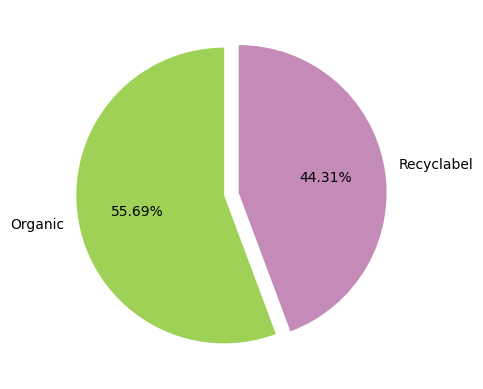

In [15]:
colors= ['#a0d157','#c48bb8']
plt.pie(data.label.value_counts(),labels=['Organic','Recyclabel'],autopct= '%0.2f%%', colors = colors, startangle= 90, explode = [0.05, 0.05])
plt.show()

In [16]:
#checking total images and their dimensions 
all_shapes = []
for file in glob(train_path + '/*/*'):
    img = cv2.imread(file)
    all_shapes.append(img.shape)
    
print("Total Images:", len(all_shapes))
print("Image Dimensions (unique):", set(all_shapes))


Total Images: 22564
Image Dimensions (unique): {(161, 314, 3), (263, 192, 3), (190, 190, 3), (207, 220, 3), (245, 206, 3), (166, 249, 3), (250, 201, 3), (195, 259, 3), (227, 223, 3), (182, 277, 3), (284, 177, 3), (160, 246, 3), (182, 182, 3), (136, 300, 3), (200, 97, 3), (189, 267, 3), (228, 222, 3), (194, 211, 3), (194, 200, 3), (223, 87, 3), (104, 486, 3), (118, 425, 3), (140, 361, 3), (92, 545, 3), (150, 200, 3), (153, 229, 3), (299, 154, 3), (160, 314, 3), (262, 192, 3), (231, 219, 3), (163, 310, 3), (190, 220, 3), (244, 206, 3), (124, 407, 3), (192, 263, 3), (178, 270, 3), (200, 184, 3), (225, 160, 3), (131, 386, 3), (216, 234, 3), (113, 200, 3), (157, 236, 3), (91, 551, 3), (317, 159, 3), (196, 196, 3), (200, 252, 3), (187, 270, 3), (127, 398, 3), (251, 78, 3), (219, 231, 3), (138, 364, 3), (194, 260, 3), (125, 404, 3), (156, 324, 3), (294, 172, 3), (191, 225, 3), (222, 88, 3), (153, 210, 3), (152, 333, 3), (222, 222, 3), (200, 253, 3), (207, 204, 3), (148, 340, 3), (128, 392, 3)

In [17]:
#checking the classes
import os
classes = [os.path.basename(category) for category in glob(train_path + '/*')]
print("Classes:", classes)


Classes: ['O', 'R']


In [18]:
#class distribution
from collections import Counter
class_counts = Counter(y_data)
print("Class Distribution:", class_counts)

Class Distribution: Counter({'TRAIN\\O': 12565, 'TRAIN\\R': 9999})


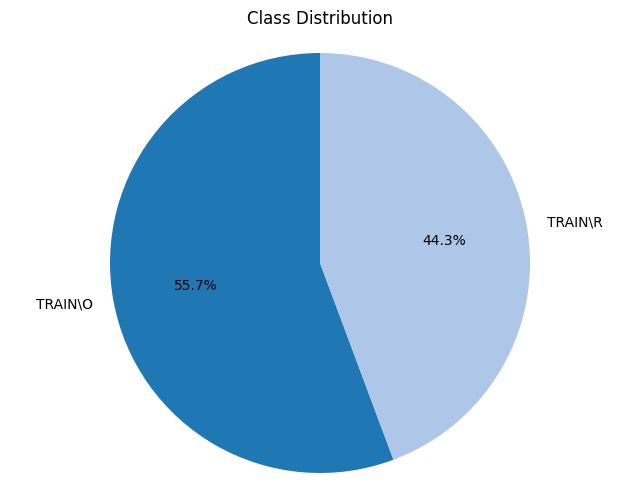

In [19]:
labels = list(class_counts.keys())
sizes = list(class_counts.values())
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=plt.cm.tab20.colors)
plt.title('Class Distribution')
plt.axis('equal')  
plt.show()

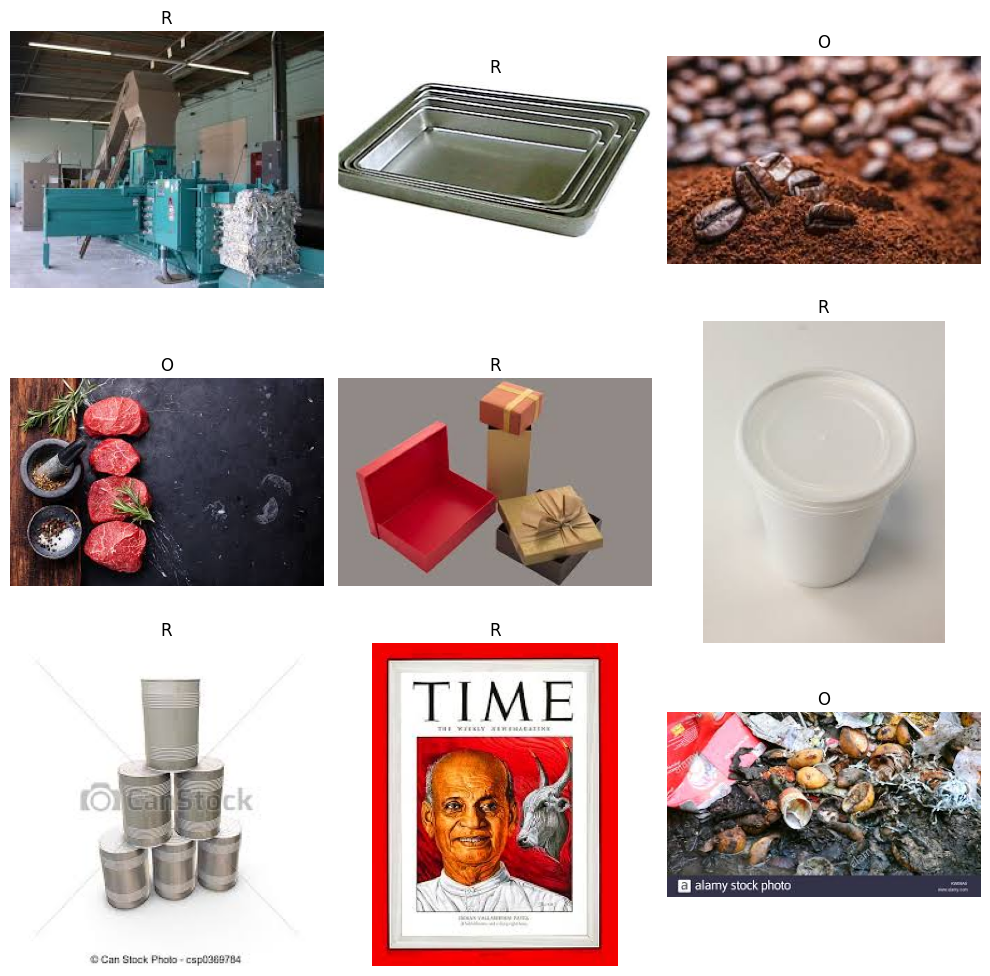

In [20]:
#Displaying a few random images from the dataset with labels 
import random
sample_files = random.sample(glob(train_path + '/*/*'), 9)
plt.figure(figsize=(10, 10))
for i, file in enumerate(sample_files):
    img = cv2.imread(file)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
    plt.subplot(3, 3, i + 1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(os.path.basename(os.path.dirname(file)))
plt.tight_layout()
plt.show()


In [21]:
#image size outliners
sizes = [cv2.imread(file).shape[:2] for file in glob(train_path + '/*/*')]
print("Min Size:", np.min(sizes, axis=0))
print("Max Size:", np.max(sizes, axis=0))

Min Size: [69 51]
Max Size: [383 600]


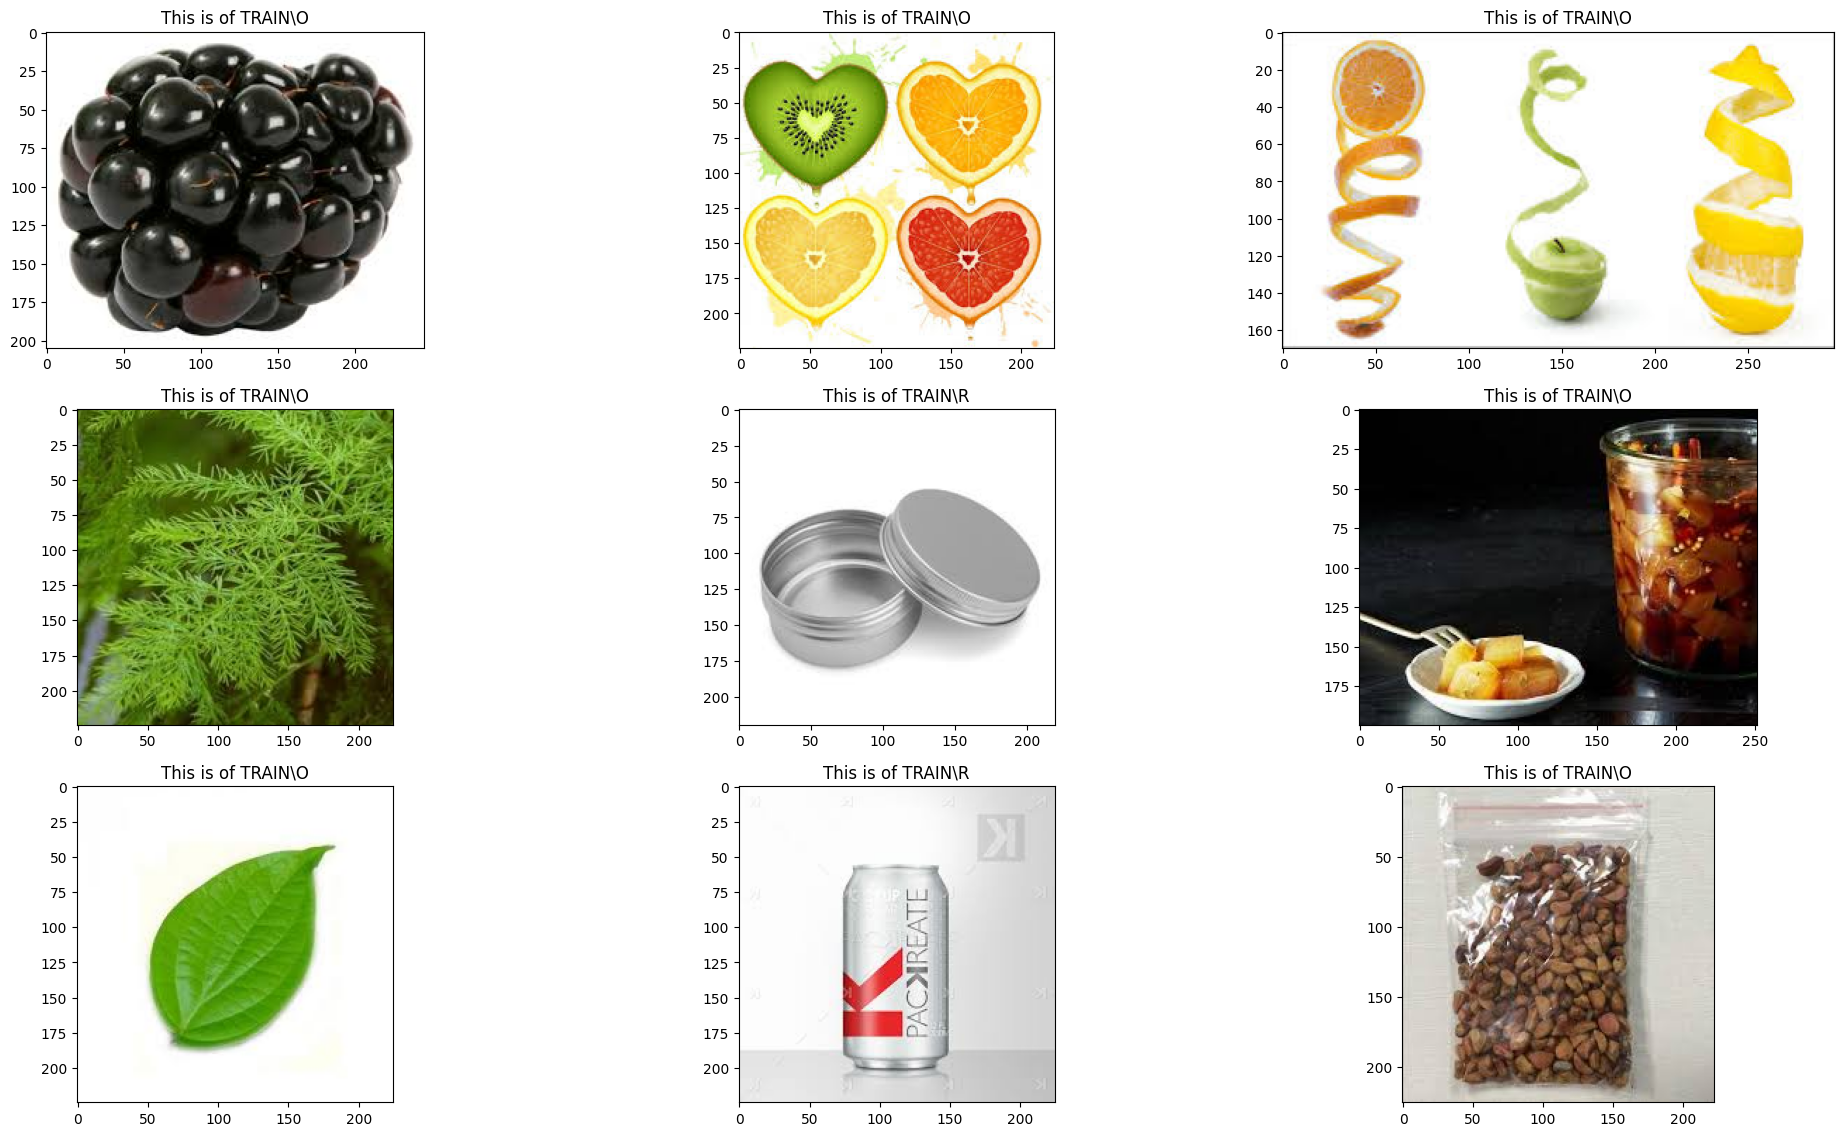

In [22]:
plt.figure(figsize=(20,15))
for i in range (9):
    plt.subplot(4, 3,(i%12)+1)
    index = np.random.randint(15000)
    plt.title('This is of {0}'.format(data.label[index]))
    plt.imshow(data.image[index])
    plt.tight_layout()

## CNN - Convolutional Neural Network

In [31]:
model = Sequential()
model.add(Conv2D(32, (3,3), input_shape = (224, 224, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(128, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(2))
model.add(Activation('sigmoid'))

model.compile(loss = "binary_crossentropy",
              optimizer = "adam" ,
              metrics = ["accuracy"])
batch_size = 256 

In [24]:
model.summary() #the overall summary of model

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 242, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 242, 222, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 121, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 119, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 119, 109, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 59, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 57, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 57, 52, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 93184)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    23,855,360 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │           130 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 2)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,965,186 (91.42 MB)

 Trainable params: 23,965,186 (91.42 MB)

 Non-trainable params: 0 (0.00 B)

In [32]:
train_datagen = ImageDataGenerator(rescale= 1./255)

In [33]:
test_datagen = ImageDataGenerator(rescale= 1./255)

In [34]:
train_generator = train_datagen.flow_from_directory(  #to make generator work 
    train_path,  
    target_size =(224,224),
    batch_size = batch_size,
    color_mode ="rgb",
    class_mode ="categorical"
)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size =(224,224),
    batch_size = batch_size,
    color_mode ="rgb",
    class_mode ="categorical"
)

Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [35]:
try:
    hist = model.fit(train_generator, epochs=10, validation_data=test_generator)
except Exception as e:
    print("Error:", str(e))


Epoch 1/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 397s 4s/step - accuracy: 0.7312 - loss: 0.5782 - val_accuracy: 0.8285 - val_loss: 0.4104
Epoch 2/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 400s 4s/step - accuracy: 0.8249 - loss: 0.4143 - val_accuracy: 0.8667 - val_loss: 0.3542
Epoch 3/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 377s 4s/step - accuracy: 0.8466 - loss: 0.3710 - val_accuracy: 0.8766 - val_loss: 0.3041
Epoch 4/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 383s 4s/step - accuracy: 0.8665 - loss: 0.3354 - val_accuracy: 0.8858 - val_loss: 0.2899
Epoch 5/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 401s 5s/step - accuracy: 0.8737 - loss: 0.3122 - val_accuracy: 0.8894 - val_loss: 0.2976
Epoch 6/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 365s 4s/step - accuracy: 0.8888 - loss: 0.2793 - val_accuracy: 0.8910 - val_loss: 0.2962
Epoch 7/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 362s 4s/step - accuracy: 0.8982 - loss: 0.2562 - val_accuracy: 0.8886 - val_loss: 0.2980
Epoch 8/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 361s 4s/step - accuracy: 0.9249 - loss: 0.2051 - val_accuracy: 0.8910 - v